<b>
Гіпотеза про значущість взаємозв'язку та коефіцієнт детермінації<br>
Умови застосування лінійної регресії з одним предиктором<br>
Застосування регресійного аналізу та інтерпретація результатів
</b>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Є дані по штатах з різними значеннями:<br>
<li>metro_res - відсоток населення, що живе в столиці
<li>white - відсоток білого населення
<li>hs_grad - відсоток людей з освітою
<li>poverty - рівень бідності
<li>female_house - відсоток будинків, де є домогосподарки<br>
    
Досліджуємо зв'язок рівня освіти та бідності, де бідність буде ЗП, а рівень освіти НП.<br>

Перше, що нам необхідно зробити, це побудувати лінійну модель, яка найкраще описуватиме наші дані.

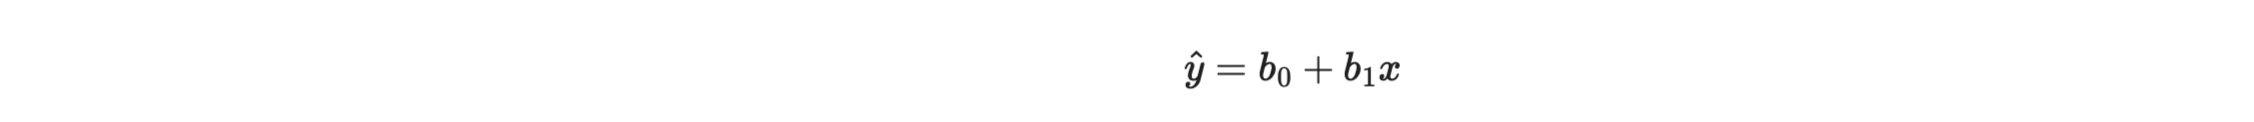

Далі, побудувавши нашу модель, нам треба дізнатися, наскільки добре наша пояснює ЗП, для цього знайдемо коефіцієнт детермінації R<sup>2</sup>

Перевіримо нульову гіпотезу:

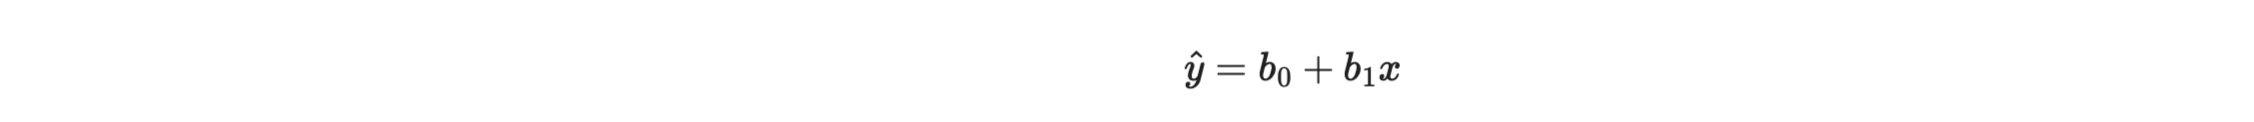

Третє наше завдання – це завдання передбачення, за даними НП ми хочемо передбачити ЗП.

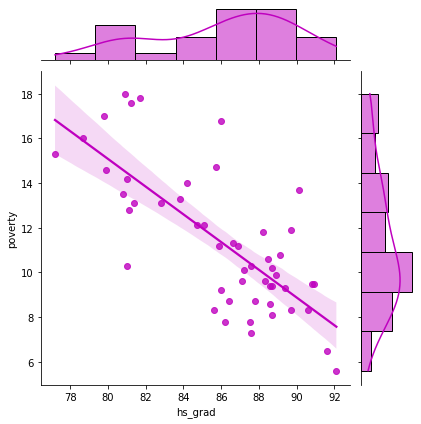

In [15]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

In [16]:
df_descr = df.describe().transpose()
df_descr

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


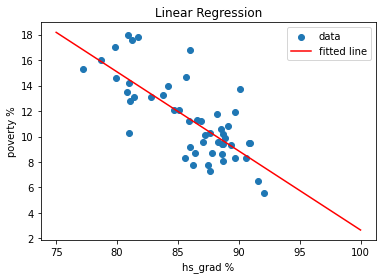

In [17]:
'''Построим модель'''
from scipy.stats import linregress

slope, intercept, r, p, std_err =  linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)

reg = lambda x: intercept + slope*x
plt.scatter(x='hs_grad', y='poverty', data=df, label='data')
plt.xlabel('hs_grad %')
plt.ylabel('poverty %')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()